# Navigation

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
# !pip -q install ./python

In [1]:
import gym
# !pip3 install box2d
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 

# !python -m pip install pyvirtualdisplay
# from pyvirtualdisplay import Display
# display = Display(visible=0, size=(1400, 900))
# display.start()

# is_ipython = 'inline' in plt.get_backend()
# if is_ipython:
#     from IPython import display

# plt.ion()

In [2]:
# !python -m ipykernel install --user --name drlnd --display-name "drlnd"


In [3]:
from unityagents import UnityEnvironment
import numpy as np


The environment is already saved in the Workspace and can be accessed at the file path provided below.  Please run the next code cell without making any changes.

In [6]:
# please do not modify the line below
file_path = r"E:\Bats_wall_following\RLecho\Navigation-DeepRL\Unity_sim_banana\Banana_Windows_x86_64"
env = UnityEnvironment(file_name= file_path+"\Banana.exe")
# env = UnityEnvironment(file_name="C:\Reinforcement\Banana\deep-reinforcement-learning\p1_navigation\Banana_Windows_x86_64\Banana_Windows_x86_64\Banana.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [14]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [8]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agent while it is training**, and you should set `train_mode=True` to restart the environment.

In [9]:
env_info = env.reset(train_mode=True)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    #print(len(next_state))
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 0.0


In [10]:
from dqn_agent import Agent
agent = Agent(state_size=37, action_size=4, seed=0)

the device that will be used is cuda:0


In [14]:
# !pip install torchsummary

  Using cached https://files.pythonhosted.org/packages/7d/18/1474d06f721b86e6a9b9d7392ad68bed711a02f3b61ac43f13c719db50a6/torchsummary-1.5.1-py3-none-any.whl


In [11]:
from torchsummary import summary
summary(agent.qnetwork_local , (37,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 64]           2,432
            Linear-2                   [-1, 64]           4,160
            Linear-3                    [-1, 4]             260
Total params: 6,852
Trainable params: 6,852
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.03
Estimated Total Size (MB): 0.03
----------------------------------------------------------------


AttributeError: 'QNetwork' object has no attribute 'summary'

Episode 1	Average Score: 0.00
Episode 2	Average Score: 0.00
Episode 3	Average Score: 0.00
Episode 4	Average Score: 0.00
Episode 5	Average Score: 0.40
Episode 6	Average Score: 0.67
Episode 7	Average Score: 0.57
Episode 8	Average Score: 0.50
Episode 9	Average Score: 0.56
Episode 10	Average Score: 0.70
Episode 11	Average Score: 0.55
Episode 12	Average Score: 0.58
Episode 13	Average Score: 0.54
Episode 14	Average Score: 0.50
Episode 15	Average Score: 0.40
Episode 16	Average Score: 0.38
Episode 17	Average Score: 0.24
Episode 18	Average Score: 0.22
Episode 19	Average Score: 0.16
Episode 20	Average Score: 0.15
Episode 21	Average Score: 0.14
Episode 22	Average Score: 0.05
Episode 23	Average Score: 0.04
Episode 24	Average Score: 0.00
Episode 25	Average Score: 0.04
Episode 26	Average Score: -0.04
Episode 27	Average Score: -0.04
Episode 28	Average Score: 0.04
Episode 29	Average Score: 0.10
Episode 30	Average Score: 0.07
Episode 31	Average Score: 0.13
Episode 32	Average Score: 0.16
Episode 33	Aver

Episode 261	Average Score: 6.35
Episode 262	Average Score: 6.40
Episode 263	Average Score: 6.43
Episode 264	Average Score: 6.43
Episode 265	Average Score: 6.46
Episode 266	Average Score: 6.48
Episode 267	Average Score: 6.51
Episode 268	Average Score: 6.55
Episode 269	Average Score: 6.62
Episode 270	Average Score: 6.71
Episode 271	Average Score: 6.74
Episode 272	Average Score: 6.69
Episode 273	Average Score: 6.74
Episode 274	Average Score: 6.80
Episode 275	Average Score: 6.80
Episode 276	Average Score: 6.90
Episode 277	Average Score: 6.91
Episode 278	Average Score: 6.97
Episode 279	Average Score: 7.01
Episode 280	Average Score: 7.00
Episode 281	Average Score: 7.00
Episode 282	Average Score: 7.04
Episode 283	Average Score: 7.11
Episode 284	Average Score: 7.09
Episode 285	Average Score: 7.18
Episode 286	Average Score: 7.12
Episode 287	Average Score: 7.12
Episode 288	Average Score: 7.07
Episode 289	Average Score: 7.04
Episode 290	Average Score: 6.98
Episode 291	Average Score: 6.98
Episode 

Episode 515	Average Score: 14.03
Episode 516	Average Score: 14.11
Episode 517	Average Score: 14.18
Episode 518	Average Score: 14.10
Episode 519	Average Score: 14.10
Episode 520	Average Score: 14.07
Episode 521	Average Score: 14.05
Episode 522	Average Score: 14.08
Episode 523	Average Score: 14.18
Episode 524	Average Score: 14.23
Episode 525	Average Score: 14.30
Episode 526	Average Score: 14.33
Episode 527	Average Score: 14.33
Episode 528	Average Score: 14.39
Episode 529	Average Score: 14.34
Episode 530	Average Score: 14.31
Episode 531	Average Score: 14.29
Episode 532	Average Score: 14.33
Episode 533	Average Score: 14.34
Episode 534	Average Score: 14.42
Episode 535	Average Score: 14.55
Episode 536	Average Score: 14.53
Episode 537	Average Score: 14.59
Episode 538	Average Score: 14.59
Episode 539	Average Score: 14.62
Episode 540	Average Score: 14.62
Episode 541	Average Score: 14.58
Episode 542	Average Score: 14.58
Episode 543	Average Score: 14.61
Episode 544	Average Score: 14.51
Episode 54

Episode 764	Average Score: 15.79
Episode 765	Average Score: 15.73
Episode 766	Average Score: 15.62
Episode 767	Average Score: 15.67
Episode 768	Average Score: 15.64
Episode 769	Average Score: 15.58
Episode 770	Average Score: 15.55
Episode 771	Average Score: 15.56
Episode 772	Average Score: 15.63
Episode 773	Average Score: 15.72
Episode 774	Average Score: 15.80
Episode 775	Average Score: 15.87
Episode 776	Average Score: 15.85
Episode 777	Average Score: 15.87
Episode 778	Average Score: 15.82
Episode 779	Average Score: 15.88
Episode 780	Average Score: 15.88
Episode 781	Average Score: 15.99
Episode 782	Average Score: 16.01

Environment solved in 682 episodes!	Average Score: 16.01


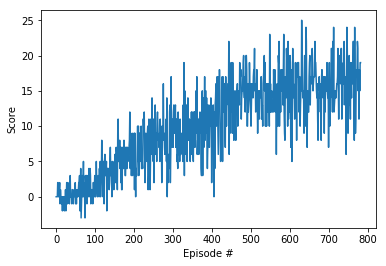

In [16]:


def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0]
        score = 0
        #print("hello")
        for t in range(max_t):
            action = agent.act(state, eps)
            env_info = env.step(action.astypeype(int))[brain_name]
            next_state = env_info.vector_observations[0]
            reward = env_info.rewards[0]
            done = env_info.local_done[0]
            agent.step(state, action, reward, next_state, done)
            #print(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 1 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=16.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            if np.mean(scores_window)>=16.0:
                break
    return scores

scores = dqn()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [25]:
# load the weights from file
# running the trained model specfic to unity 
agent.qnetwork_local.load_state_dict(torch.load('checkpoint.pth'))

env_info = env.reset(train_mode=False)[brain_name]
state = env_info.vector_observations[0]
for i in range(30):
    env_info = env.reset(train_mode=False)[brain_name]
    state = env_info.vector_observations[0]
#     img = plt.imshow(enstate = env.reset()v.render(mode='rgb_array'))
    for j in range(300):
        
        action = agent.act(state)
        env_info = env.step(action.astype(int))[brain_name]
        state = env_info.vector_observations[0]
        done = env_info.local_done[0]
#         img.set_data(env.render(mode='rgb_array')) 
#         plt.axis('off')
#         display.display(plt.gcf())
#         display.clear_output(wait=True)
#         state, reward, done, _ = env.step(action)
        if done:
            print("e")
            break 
            
# env.close()

e
e
e
e
e
e
e
e
e
e
e
e
e
e
e
e
e
e
e
e
e
e
e
e
e
e
e
e
e
e


When finished, you can close the environment.

In [11]:
# env.close()

In [ ]:
# this is second trying use the same agent to solve cart pole problem

In [26]:
env1 = gym.make('CartPole-v0')

In [28]:
print("the enviroment observtion space", env1.observation_space ,"action space", env1.action_space)

the enviroment observtion space Box(4,) action space Discrete(2)


In [30]:
action = 1
env1.reset()
observation, reward, done, info = env1.step(action)
print("the observation size", len(observation), "the reduced observation", observation)
state_Type = type(observation)
print("the state_type of the observation", state_Type , observation)

the observation size 4 the reduced observation [ 0.0045049   0.23425463  0.00331465 -0.26983945]
the state_type of the observation <class 'numpy.ndarray'> [ 0.0045049   0.23425463  0.00331465 -0.26983945]


In [39]:
action_size = 2
score = 0 # initialize the score
i = 30
while i > 0:
    action = np.random.randint(action_size)               # select an action
    observation, reward, done, info = env1.step(action)      # send the action to the environment
    next_state = observation                                # see if episode has finished
    
    
    score += reward                                         # update the score
    state = next_state                                      # roll over the state to next time step
    i-=1
    if done:                                                # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 13.0


In [43]:
len(observation)

4

In [47]:

pen_agent = Agent(state_size=len(observation), action_size = 2 , seed = 0 )

summary(pen_agent.qnetwork_local , (4,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 64]             320
            Linear-2                   [-1, 64]           4,160
            Linear-3                    [-1, 2]             130
Total params: 4,610
Trainable params: 4,610
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.02
Estimated Total Size (MB): 0.02
----------------------------------------------------------------


Episode 1	Average Score: 14.00
Episode 2	Average Score: 19.00
Episode 3	Average Score: 19.00
Episode 4	Average Score: 19.00
Episode 5	Average Score: 19.80
Episode 6	Average Score: 18.50
Episode 7	Average Score: 18.43
Episode 8	Average Score: 19.00
Episode 9	Average Score: 18.78
Episode 10	Average Score: 19.30
Episode 11	Average Score: 18.82
Episode 12	Average Score: 18.75
Episode 13	Average Score: 18.85
Episode 14	Average Score: 18.43
Episode 15	Average Score: 19.53
Episode 16	Average Score: 19.88
Episode 17	Average Score: 20.35
Episode 18	Average Score: 20.17
Episode 19	Average Score: 19.74
Episode 20	Average Score: 19.20
Episode 21	Average Score: 18.81
Episode 22	Average Score: 18.77
Episode 23	Average Score: 18.57
Episode 24	Average Score: 18.58
Episode 25	Average Score: 18.68
Episode 26	Average Score: 18.62
Episode 27	Average Score: 18.41
Episode 28	Average Score: 18.14
Episode 29	Average Score: 18.52
Episode 30	Average Score: 18.40
Episode 31	Average Score: 18.26
Episode 32	Averag

Episode 256	Average Score: 11.73
Episode 257	Average Score: 11.75
Episode 258	Average Score: 11.76
Episode 259	Average Score: 11.70
Episode 260	Average Score: 11.78
Episode 261	Average Score: 11.77
Episode 262	Average Score: 11.76
Episode 263	Average Score: 11.71
Episode 264	Average Score: 11.67
Episode 265	Average Score: 11.58
Episode 266	Average Score: 11.58
Episode 267	Average Score: 11.59
Episode 268	Average Score: 11.50
Episode 269	Average Score: 11.43
Episode 270	Average Score: 11.38
Episode 271	Average Score: 11.40
Episode 272	Average Score: 11.38
Episode 273	Average Score: 11.37
Episode 274	Average Score: 11.32
Episode 275	Average Score: 11.27
Episode 276	Average Score: 11.28
Episode 277	Average Score: 11.27
Episode 278	Average Score: 11.19
Episode 279	Average Score: 11.17
Episode 280	Average Score: 11.19
Episode 281	Average Score: 11.16
Episode 282	Average Score: 11.13
Episode 283	Average Score: 11.13
Episode 284	Average Score: 11.11
Episode 285	Average Score: 11.09
Episode 28

Episode 505	Average Score: 10.01
Episode 506	Average Score: 10.01
Episode 507	Average Score: 10.02
Episode 508	Average Score: 10.02
Episode 509	Average Score: 10.03
Episode 510	Average Score: 10.04
Episode 511	Average Score: 10.02
Episode 512	Average Score: 10.01
Episode 513	Average Score: 10.00
Episode 514	Average Score: 9.98
Episode 515	Average Score: 9.97
Episode 516	Average Score: 10.00
Episode 517	Average Score: 9.99
Episode 518	Average Score: 10.00
Episode 519	Average Score: 10.01
Episode 520	Average Score: 10.00
Episode 521	Average Score: 10.01
Episode 522	Average Score: 10.01
Episode 523	Average Score: 9.99
Episode 524	Average Score: 9.99
Episode 525	Average Score: 10.00
Episode 526	Average Score: 9.99
Episode 527	Average Score: 9.98
Episode 528	Average Score: 9.99
Episode 529	Average Score: 9.97
Episode 530	Average Score: 9.99
Episode 531	Average Score: 9.98
Episode 532	Average Score: 9.99
Episode 533	Average Score: 10.00
Episode 534	Average Score: 10.01
Episode 535	Average Sc

Episode 766	Average Score: 9.58
Episode 767	Average Score: 9.58
Episode 768	Average Score: 9.56
Episode 769	Average Score: 9.58
Episode 770	Average Score: 9.57
Episode 771	Average Score: 9.58
Episode 772	Average Score: 9.58
Episode 773	Average Score: 9.56
Episode 774	Average Score: 9.56
Episode 775	Average Score: 9.54
Episode 776	Average Score: 9.53
Episode 777	Average Score: 9.55
Episode 778	Average Score: 9.55
Episode 779	Average Score: 9.54
Episode 780	Average Score: 9.54
Episode 781	Average Score: 9.54
Episode 782	Average Score: 9.54
Episode 783	Average Score: 9.54
Episode 784	Average Score: 9.53
Episode 785	Average Score: 9.53
Episode 786	Average Score: 9.51
Episode 787	Average Score: 9.51
Episode 788	Average Score: 9.52
Episode 789	Average Score: 9.50
Episode 790	Average Score: 9.50
Episode 791	Average Score: 9.48
Episode 792	Average Score: 9.48
Episode 793	Average Score: 9.49
Episode 794	Average Score: 9.50
Episode 795	Average Score: 9.52
Episode 796	Average Score: 9.54
Episode 

Episode 1021	Average Score: 11.71
Episode 1022	Average Score: 11.74
Episode 1023	Average Score: 11.77
Episode 1024	Average Score: 11.80
Episode 1025	Average Score: 11.88
Episode 1026	Average Score: 11.91
Episode 1027	Average Score: 11.93
Episode 1028	Average Score: 11.95
Episode 1029	Average Score: 11.95
Episode 1030	Average Score: 11.96
Episode 1031	Average Score: 11.97
Episode 1032	Average Score: 11.96
Episode 1033	Average Score: 11.96
Episode 1034	Average Score: 11.94
Episode 1035	Average Score: 11.95
Episode 1036	Average Score: 11.96
Episode 1037	Average Score: 11.92
Episode 1038	Average Score: 11.86
Episode 1039	Average Score: 11.83
Episode 1040	Average Score: 11.85
Episode 1041	Average Score: 11.86
Episode 1042	Average Score: 11.89
Episode 1043	Average Score: 11.93
Episode 1044	Average Score: 11.99
Episode 1045	Average Score: 12.05
Episode 1046	Average Score: 12.11
Episode 1047	Average Score: 12.15
Episode 1048	Average Score: 12.20
Episode 1049	Average Score: 12.27
Episode 1050	A

Episode 1261	Average Score: 15.84
Episode 1262	Average Score: 15.86
Episode 1263	Average Score: 15.90
Episode 1264	Average Score: 16.02
Episode 1265	Average Score: 16.04
Episode 1266	Average Score: 16.01
Episode 1267	Average Score: 15.98
Episode 1268	Average Score: 15.95
Episode 1269	Average Score: 16.02
Episode 1270	Average Score: 16.10
Episode 1271	Average Score: 16.16
Episode 1272	Average Score: 16.15
Episode 1273	Average Score: 16.23
Episode 1274	Average Score: 16.22
Episode 1275	Average Score: 16.30
Episode 1276	Average Score: 16.36
Episode 1277	Average Score: 16.36
Episode 1278	Average Score: 16.36
Episode 1279	Average Score: 16.35
Episode 1280	Average Score: 16.41
Episode 1281	Average Score: 16.43
Episode 1282	Average Score: 16.51
Episode 1283	Average Score: 16.59
Episode 1284	Average Score: 16.64
Episode 1285	Average Score: 16.66
Episode 1286	Average Score: 16.61
Episode 1287	Average Score: 16.57
Episode 1288	Average Score: 16.55
Episode 1289	Average Score: 16.53
Episode 1290	A

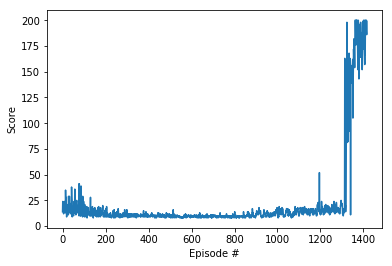

In [49]:
def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        state = env1.reset()
        score = 0
        #print("hello")
        for t in range(max_t):
            action = pen_agent.act(state, eps)
            next_state, reward, done, info = env1.step(action)      # send the action to the environment
            pen_agent.step(state, action, reward, next_state, done)
            #print(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 1 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=160.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'pen_checkpoint.pth')
            if np.mean(scores_window)>=160.0:
                break
    return scores

scores = dqn()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()